In [3]:
import numpy as np
import pandas as pd 

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [11]:
gdp = web.DataReader(name='GDP', data_source='fred', start='1980-1', end='2023-12' )
gdp

,GDP
DATE,
1980-01-01,2789.842
1980-04-01,2797.352
1980-07-01,2856.483
1980-10-01,2985.557
1981-01-01,3124.206
...,...
2022-10-01,26734.277
2023-01-01,27164.359
2023-04-01,27453.815


In [12]:
gdp.index = gdp.index.to_period(freq='Q')
gdp

,GDP
DATE,
1980Q1,2789.842
1980Q2,2797.352
1980Q3,2856.483
1980Q4,2985.557
1981Q1,3124.206
...,...
2022Q4,26734.277
2023Q1,27164.359
2023Q2,27453.815


<Axes: xlabel='DATE'>

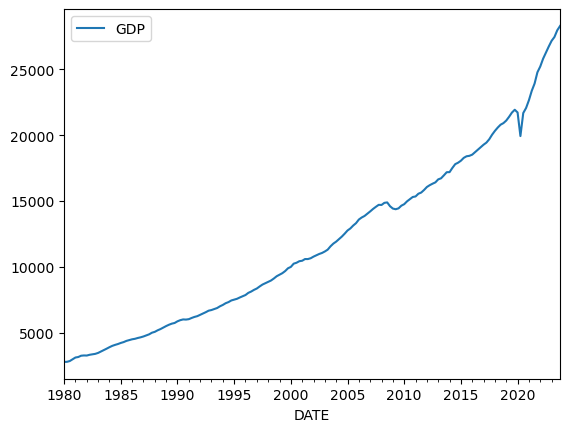

In [13]:
gdp.plot()

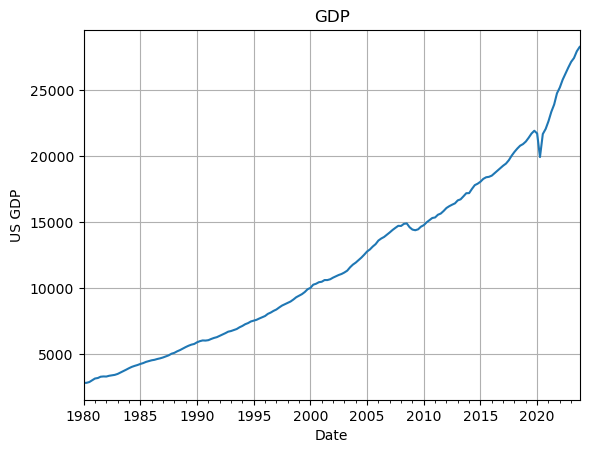

In [14]:
ax = gdp.plot(title='GDP')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US GDP')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [16]:
y= np.log(gdp)

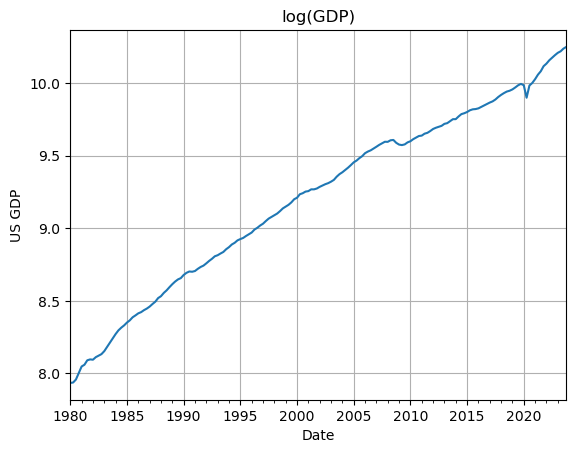

In [17]:
ax = y.plot(title='log(GDP)')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US GDP')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

# Посмотрим разность

In [18]:
y.diff()

,GDP
DATE,
1980Q1,NaN
1980Q2,0.002688
1980Q3,0.020918
1980Q4,0.044195
1981Q1,0.045394
...,...
2022Q4,0.017442
2023Q1,0.015959
2023Q2,0.010599


### Удалим пропущенные наблюдения

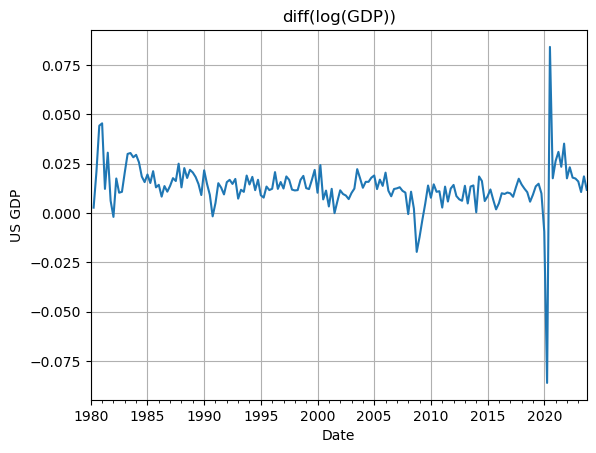

In [20]:
ax = y.diff().plot(title='diff(log(GDP))')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US GDP')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [21]:
# дифференцируем дважды

In [22]:
y.diff().diff()

,GDP
DATE,
1980Q1,NaN
1980Q2,NaN
1980Q3,0.018230
1980Q4,0.023277
1981Q1,0.001199
...,...
2022Q4,-0.000463
2023Q1,-0.001483
2023Q2,-0.005360


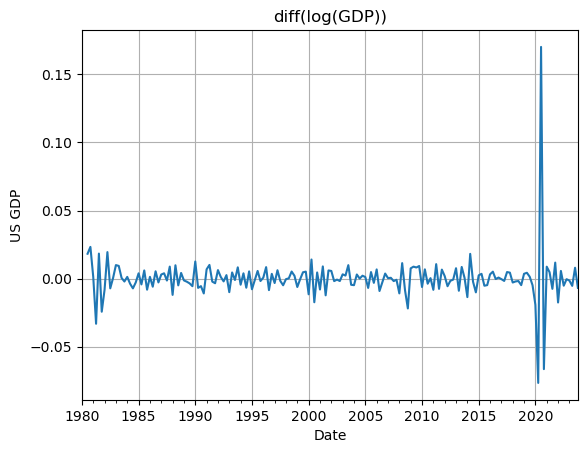

In [23]:
ax = y.diff().diff().plot(title='diff(log(GDP))')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US GDP')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

## Дробное дифференцирование

In [4]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w
def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()
def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 

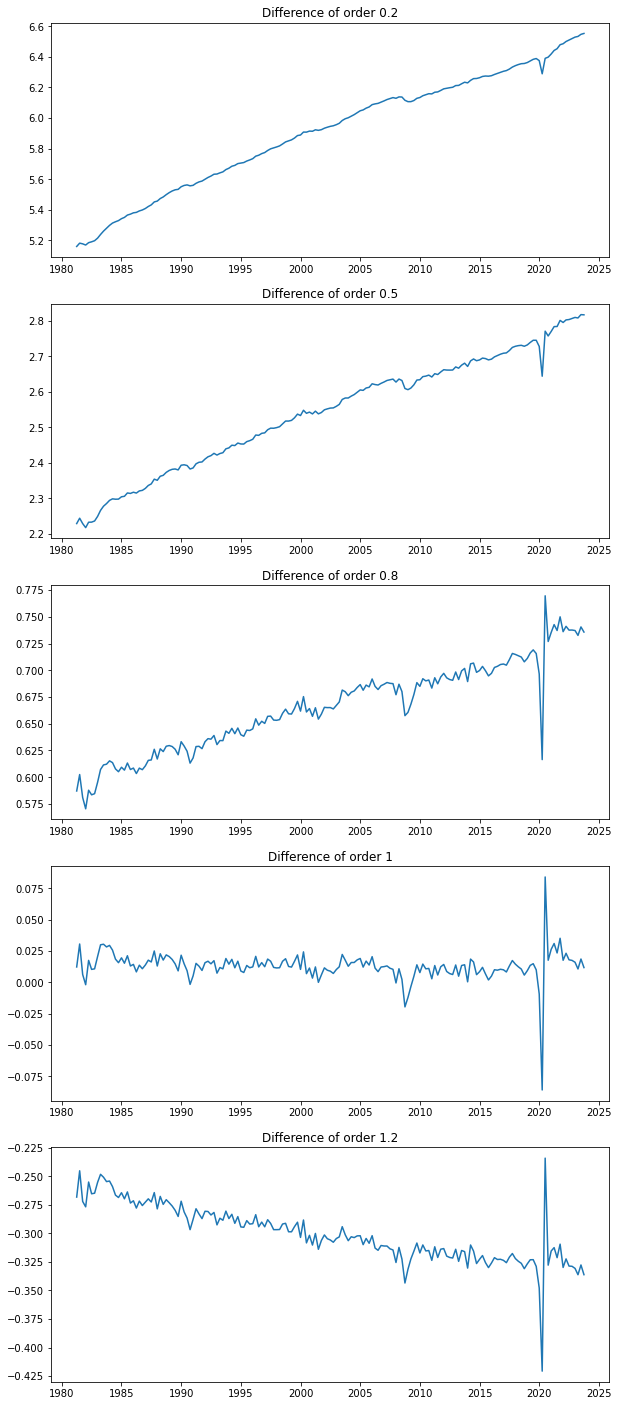

In [ ]:
gdp = web.DataReader(name='GDP', data_source='fred', start='1980-1', end='2023-12' )
gdp
y= np.log(gdp)

# не работает, если индексы изменены
differences=[0.2, 0.5, 0.8, 1, 1.2]
win_size = 5 #ограничение на глубину, учитываемых при вычислении дробного дифференцирования

# исходный ряд
fig, axs = plt.subplots(len(differences),1,figsize=(10, 5*len(differences)))

for i in range(len(differences)):
	axs[i].plot(ts_differencing(y, differences[i], win_size))
	axs[i].set_title(f'Difference of order {differences[i]}')

plt.show()


### С FRED можно импортировать несколько датасетов

In [29]:
rates = web.DataReader(name=['TB3MS', 'TB1YR', 'GS10'], data_source='fred',start='1990-01')
rates

,TB3MS,TB1YR,GS10
DATE,,,
1990-01-01,7.64,7.38,8.21
1990-02-01,7.74,7.55,8.47
1990-03-01,7.90,7.76,8.59
1990-04-01,7.77,7.80,8.79
1990-05-01,7.74,7.73,8.76
...,...,...,...
2024-10-01,4.51,4.03,4.10
2024-11-01,4.42,4.14,4.36
2024-12-01,4.27,4.05,4.39


In [30]:
# переопределяем индекс
rates.index = rates.index.to_period(freq='M')
# переименовываем переменные/столбцы
rates.columns = ['3M_rate', '1Y_rate', '10Y_rate']
rates

,3M_rate,1Y_rate,10Y_rate
DATE,,,
1990-01,7.64,7.38,8.21
1990-02,7.74,7.55,8.47
1990-03,7.90,7.76,8.59
1990-04,7.77,7.80,8.79
1990-05,7.74,7.73,8.76
...,...,...,...
2024-10,4.51,4.03,4.10
2024-11,4.42,4.14,4.36
2024-12,4.27,4.05,4.39


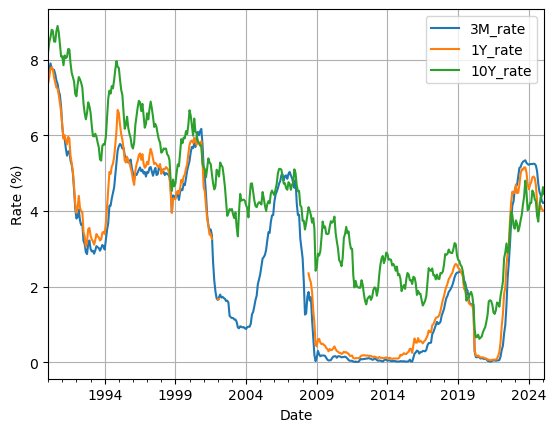

In [31]:
ax = rates.plot()

ax.set_xlabel('Date')
ax.set_ylabel('Rate (%)')
ax.grid()

plt.show()

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

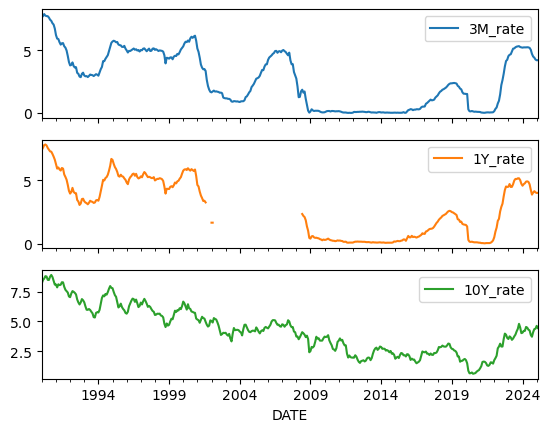

In [32]:
rates.plot(subplots=True)

# №2 - Месячные данные по М2

In [42]:
M2 = web.DataReader(name='M2SL', data_source='fred', start='1980-1', end='2023-12' )
M2

,M2SL
DATE,
1980-01-01,1482.7
1980-02-01,1494.6
1980-03-01,1499.8
1980-04-01,1502.2
1980-05-01,1512.3
...,...
2023-08-01,20750.2
2023-09-01,20700.1
2023-10-01,20688.1


In [45]:
M2.index = M2.index.to_period(freq='M')
M2

,M2SL
DATE,
1980-01,1482.7
1980-02,1494.6
1980-03,1499.8
1980-04,1502.2
1980-05,1512.3
...,...
2023-08,20750.2
2023-09,20700.1
2023-10,20688.1


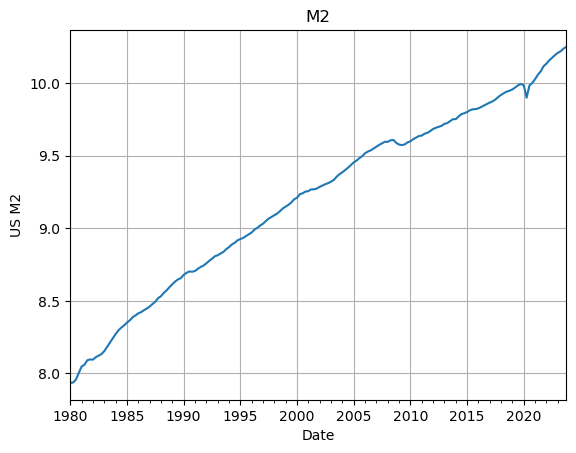

In [51]:
ax = y.plot(title='M2')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US M2')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

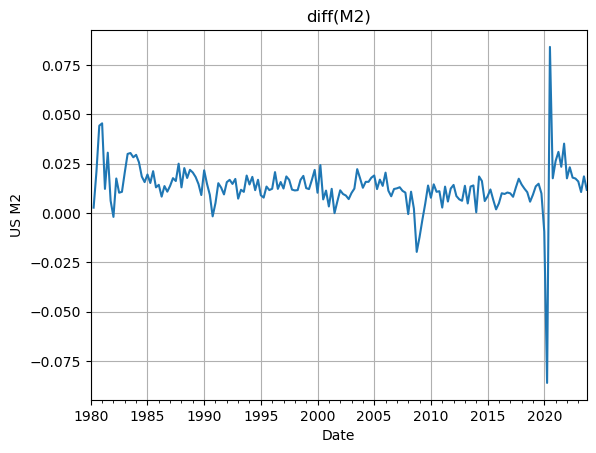

In [50]:
M2.diff()
ax = y.diff().plot(title='diff(M2)')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US M2')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

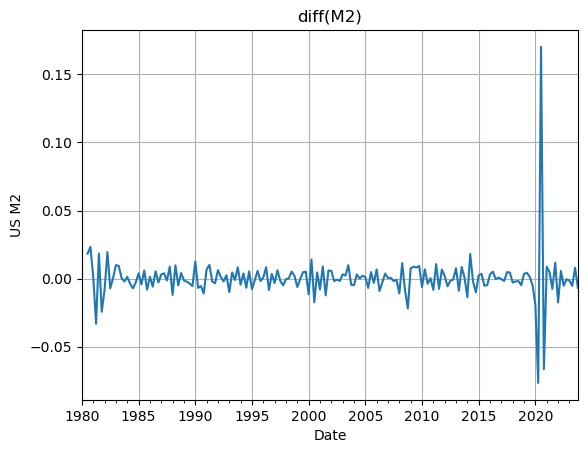

In [52]:
M2.diff()
ax = y.diff().diff().plot(title='diff(M2)')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US M2')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [53]:
M2 = web.DataReader(name='M2SL', data_source='fred', start='1980-1', end='2023-12' )

In [54]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w
def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()
def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 

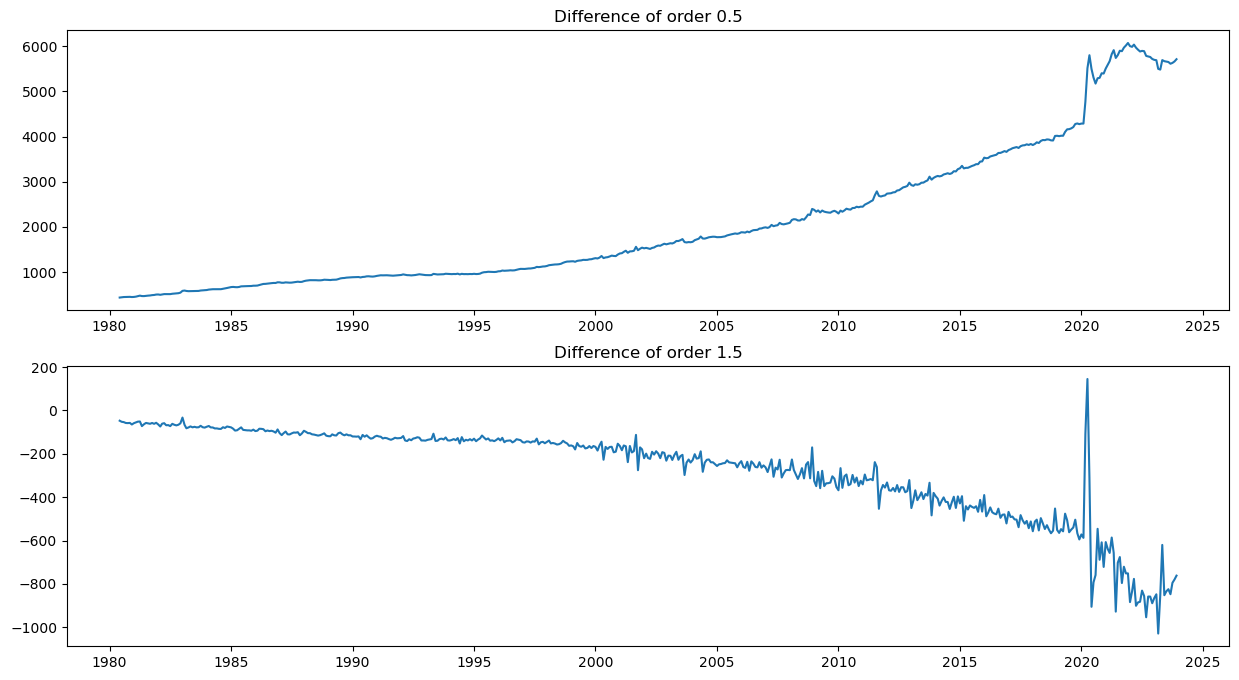

In [56]:
# не работает, если индексы изменены
differences=[0.5, 3/2]
win_size = 5

# исходный ряд
fig, axs = plt.subplots(len(differences),1,figsize=(15,4*len(differences)))

for i in range(len(differences)):
	axs[i].plot(ts_differencing(M2, differences[i], win_size))
	axs[i].set_title(f'Difference of order {differences[i]}')

plt.show()